In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [29]:
# assigining file paths
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# reading data
mouse_data = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# combining data
merged_data = pd.merge(mouse_data, study_results, how='outer', on="Mouse ID")

duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


# Storing the cleaned dataset excluding all duplicates
cleaned_study_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)== False]
cleaned_study_data.head(15)


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
1      k403     Ramicane    Male          21          16          5   
2      k403     Ramicane    Male          21          16         10   
3      k403     Ramicane    Male          21          16         15   
4      k403     Ramicane    Male          21          16         20   
5      k403     Ramicane    Male          21          16         25   
6      k403     Ramicane    Male          21          16         30   
7      k403     Ramicane    Male          21          16         35   
8      k403     Ramicane    Male          21          16         40   
9      k403     Ramicane    Male          21          16         45   
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   

    Tumor Volume (mm3)  Metastatic Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  
3            34.223992                 1  
4            32.997729                 1  
5            33.464577                 1  
6            31.099498                 1  
7            26.546993                 1  
8            24.365505                 1  
9            22.050126                 1  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0

In [4]:
# create drug_regimen group
regimen_group = cleaned_study_data.groupby(["Drug Regimen"])

# mean of tumor volume
tumor_mean = regimen_group["Tumor Volume (mm3)"].mean()
# median of tumor volume
tumor_median = regimen_group["Tumor Volume (mm3)"].median()
# variance of tumor volume
tumor_variance = regimen_group["Tumor Volume (mm3)"].var()
# standard deviation of tume volume
tumor_stdev = regimen_group["Tumor Volume (mm3)"].std()
# SEM of tumor volume
tumor_sem =regimen_group["Tumor Volume (mm3)"].sem()
# Creating measurements column
measurements = cleaned_study_data['Drug Regimen'].value_counts()

# Creating data frame with the information above
tumor_volume_summary = pd.DataFrame({"Measurements": measurements,
                                     "Mean": tumor_mean, 
                                    "Median": tumor_median,
                                    "Variance": tumor_variance,
                                    "Standard Deviation": tumor_stdev,
                                    "SEM": tumor_sem})
tumor_volume_summary.head(10)

Measurements       Mean     Median   Variance  Standard Deviation  \
Capomulin           230  40.675741  41.557809  24.947764            4.994774   
Ceftamin            178  52.591172  51.776157  39.290177            6.268188   
Infubinol           178  52.884795  51.820584  43.128684            6.567243   
Ketapril            188  55.235638  53.698743  68.553577            8.279709   
Naftisol            186  54.331565  52.509285  66.173479            8.134708   
Placebo             181  54.033581  52.288934  61.168083            7.821003   
Propriva            148  52.320930  50.446266  43.852013            6.622085   
Ramicane            228  40.216745  40.673236  23.486704            4.846308   
Stelasyn            181  54.233149  52.431737  59.450562            7.710419   
Zoniferol           182  53.236507  51.818479  48.533355            6.966589   

                SEM  
Capomulin  0.329346  
Ceftamin   0.469821  
Infubinol  0.492236  
Ketapril   0.603860  
Naftisol   0.596466  
Placebo    0.581331  
Propriva   0.544332  
Ramicane   0.320955  
Stelasyn   0.573111  
Zoniferol  0.516398

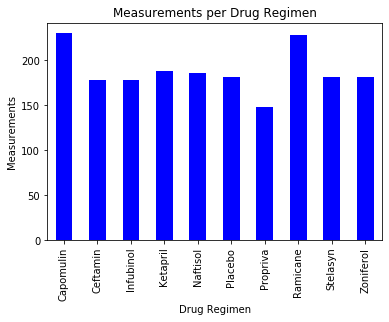

In [5]:
# creating graph of the above using matplot
measurement_bar = tumor_volume_summary[["Measurements"]].plot(grid=False, color='b', kind='bar', zorder=2, legend=False, )

plt.title('Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements')

#Saving figure to folder for viewing outside jupyter
plt.savefig('Figures/Pandas Bar Figure 1.jpg')

In [6]:
# setting variables
x_axis = np.arange(len(tumor_volume_summary))
y_axis = tumor_volume_summary["Measurements"]
drug_regimen = cleaned_study_data["Drug Regimen"].drop_duplicates()
drug_regimen_list = drug_regimen.tolist()

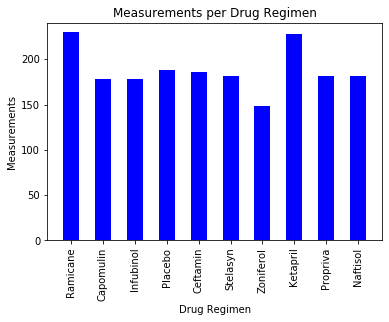

In [7]:
plt.bar(drug_regimen_list, y_axis, width =.5, color='b', align='center', tick_label='')

# Formatting
#Tick mark location
tick_locations = [value for value in drug_regimen_list]
plt.xticks(tick_locations, drug_regimen_list, rotation='90')

#Setting limits
# Set the limits of the x axis
plt.xlim(-0.75, len(drug_regimen_list)-0.25)
# Set the limits of the y axis
plt.ylim(0, max(y_axis)+10)

# Labeling 
plt.title("Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")
plt.savefig('Figures/Matplot Bar Figure 2.jpg')

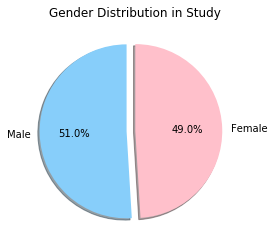

In [8]:
# Pandas Pie chart

# Getting data
genders = cleaned_study_data["Sex"].drop_duplicates().reset_index()
gender_counts = cleaned_study_data["Sex"].value_counts()
explode = (0.1,0)
colors = ['lightskyblue','pink']

# creating graph
pandas_pie = gender_counts.plot.pie(colors=colors, explode=explode,autopct="%1.1f%%", shadow=True,startangle=90)

# Formatting 
plt.title("Gender Distribution in Study")
# removing the y label
plt.ylabel("")

# Saving Graphs
plt.savefig('Figures/Pandas Pie Figure 1.jpg')

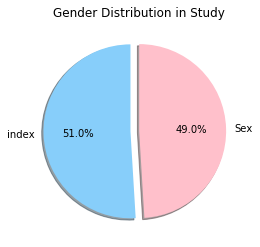

In [9]:
# Matplotlib pie chart

# Creating chart
plt.pie(gender_counts, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)


plt.title("Gender Distribution in Study")

# Saving chart
plt.savefig('Figures/Matplot Pie Figure 2.jpg')

In [10]:
# Creating all top drug df's
capomulin = cleaned_study_data.loc[(cleaned_study_data["Drug Regimen"] == "Capomulin"),:]
ramicane = cleaned_study_data.loc[cleaned_study_data["Drug Regimen"] == "Ramicane", :]
infubinol = cleaned_study_data.loc[cleaned_study_data["Drug Regimen"] == "Infubinol", :]
ceftamin = cleaned_study_data.loc[cleaned_study_data["Drug Regimen"] == "Ceftamin", :]


In [11]:


# Capomulin Final Tumor Volume Data
capomulin_last_time = capomulin.groupby("Mouse ID")["Timepoint"].max()
capomulin_last = pd.DataFrame(capomulin_last_time)
capomulin_merge = pd.merge(capomulin_last,cleaned_study_data, on=('Mouse ID', 'Timepoint'), how="left")

capomulin_tumor = capomulin_merge["Tumor Volume (mm3)"]

# Setting Quartiles
cap_quartiles = capomulin_tumor.quantile([0.25,0.5,0.75])
cap_low_quartile = cap_quartiles[0.25]
cap_upper_quartile = cap_quartiles[0.75]
cap_iqr = cap_upper_quartile - cap_low_quartile

# Determining bounds to locate outliers
cap_lower_bound = cap_low_quartile - (1.5*cap_iqr)
cap_upper_bound = cap_upper_quartile + (1.5*cap_iqr)

print(f"The lower quartile of Capomulin tumors: {cap_low_quartile}")
print(f"The upper quartile of Capomulin tumors: {cap_upper_quartile}")
print(f"The interquartile range of Capomulin tumors: {cap_iqr}")
print(f"The median of Capomulin tumors: {cap_quartiles[0.5]} ")

# finding outliers
cap_outliers = capomulin.loc[(capomulin['Tumor Volume (mm3)'] > cap_upper_bound) | (capomulin['Tumor Volume (mm3)'] < cap_lower_bound), :]
cap_outliers.head(5)



The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 


Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

In [12]:
# Ramicane Final Tumor Volume Data
ramicane_last_time = ramicane.groupby("Mouse ID")["Timepoint"].max()
ramicane_last = pd.DataFrame(ramicane_last_time)
ramicane_merge = pd.merge(ramicane_last,cleaned_study_data, on=('Mouse ID', 'Timepoint'), how="left")

ramicane_tumor = ramicane_merge["Tumor Volume (mm3)"]

# Setting Quartiles
ram_quartiles = ramicane_tumor.quantile([0.25,0.5,0.75])
ram_low_quartile = ram_quartiles[0.25]
ram_upper_quartile = ram_quartiles[0.75]
ram_iqr = ram_upper_quartile - ram_low_quartile

# Determining bounds to locate outliers
ram_lower_bound = ram_low_quartile - (1.5*ram_iqr)
ram_upper_bound = ram_upper_quartile + (1.5*ram_iqr)


print(f"The lower quartile of Ramicane tumors: {ram_low_quartile}")
print(f"The upper quartile of Ramicane tumors: {ram_upper_quartile}")
print(f"The interquartile range of Ramicane tumors: {ram_iqr}")
print(f"The median of Ramicane tumors: {ram_quartiles[0.5]} ")
# finding outliers
ram_outliers = ramicane.loc[(ramicane['Tumor Volume (mm3)'] > ram_upper_bound) | (ramicane['Tumor Volume (mm3)'] < ram_lower_bound), :]
ram_outliers.head(5)

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 


Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

In [13]:
# Infubinol Final Tumor Volume Data
infubinol_last_time = infubinol.groupby("Mouse ID")["Timepoint"].max()
infubinol_last = pd.DataFrame(infubinol_last_time)
infubinol_merge = pd.merge(infubinol_last,cleaned_study_data, on=('Mouse ID', 'Timepoint'), how="left")
infubinol_tumor = infubinol_merge["Tumor Volume (mm3)"]

# Setting Quartiles
inf_quartiles = infubinol_tumor.quantile([0.25,0.5,0.75])
inf_low_quartile = inf_quartiles[0.25]
inf_upper_quartile = inf_quartiles[0.75]
inf_iqr = inf_upper_quartile - inf_low_quartile

# Determining bounds to locate outliers
inf_lower_bound = inf_low_quartile - (1.5*inf_iqr)
inf_upper_bound = inf_upper_quartile + (1.5*inf_iqr)

print(f"The lower quartile of Infubinol tumors: {inf_low_quartile}")
print(f"The upper quartile of Infubinol tumors: {inf_upper_quartile}")
print(f"The interquartile range of Infubinol tumors: {inf_iqr}")
print(f"The median of Infubinol tumors: {inf_quartiles[0.5]} ")

# finding outliers
inf_outliers = infubinol.loc[(infubinol['Tumor Volume (mm3)'] > inf_upper_bound) | (infubinol['Tumor Volume (mm3)'] < inf_lower_bound), :]
inf_outliers.head(5)

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
669           36.321346                 0

In [14]:
# Ceftamin Final Tumor Volume Data
ceftamin_last_time = ceftamin.groupby("Mouse ID")["Timepoint"].max()
ceftamin_last = pd.DataFrame(ceftamin_last_time)
ceftamin_merge = pd.merge(ceftamin_last,cleaned_study_data, on=('Mouse ID', 'Timepoint'), how="left")

ceftamin_tumor = ceftamin_merge["Tumor Volume (mm3)"]

# Setting Quartiles
cef_quartiles = ceftamin_tumor.quantile([0.25,0.5,0.75])
cef_low_quartile = cef_quartiles[0.25]
cef_upper_quartile = cef_quartiles[0.5]
cef_iqr = cef_upper_quartile - cef_low_quartile

# Determining bounds to locate outliers
cef_lower_bound = cef_low_quartile - (1.5*cef_iqr)
cef_upper_bound = cef_upper_quartile + (1.5*cef_iqr)

print(f"The lower quartile of Ceftamin tumors: {cef_low_quartile}")
print(f"The upper quartile of Ceftamin tumors: {cef_upper_quartile}")
print(f"The interquartile range of Ceftamin tumors: {cef_iqr}")
print(f"The median of Ceftamin tumors: {cef_quartiles[0.5]} ")

# finding outliers
cef_outliers = ceftamin.loc[(ceftamin['Tumor Volume (mm3)'] > cef_upper_bound) | (ceftamin['Tumor Volume (mm3)'] < cef_lower_bound), :]
cef_outliers.head(5)

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 59.85195552
The interquartile range of Ceftamin tumors: 11.129877669999999
The median of Ceftamin tumors: 59.85195552 


Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

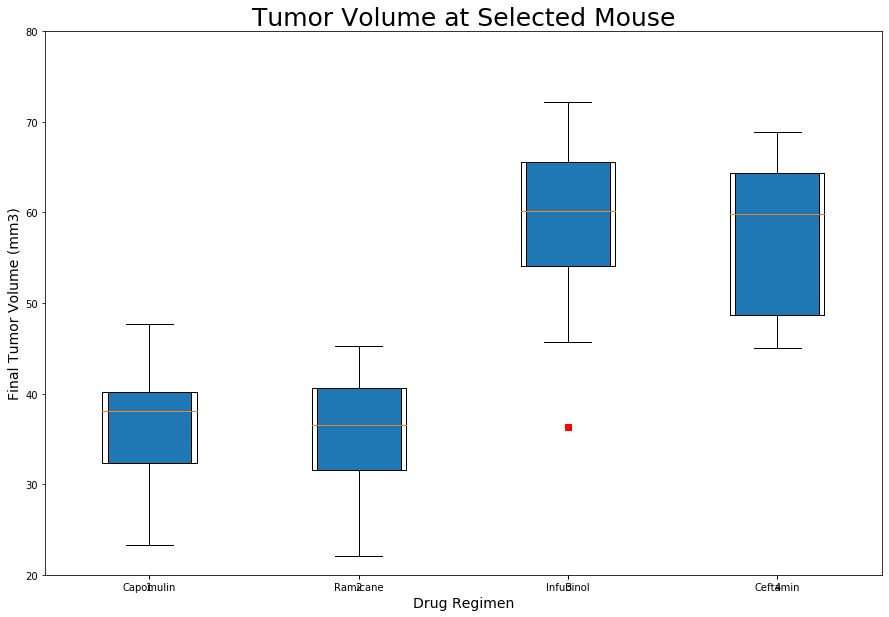

In [15]:
data_to_plot = [capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)
ax1.boxplot(data_to_plot,notch=0,sym='rs')
plt.ylim(20, 80)


plt.savefig('Figures/TumorVolume Box and Whisker.jpg')
plt.show()

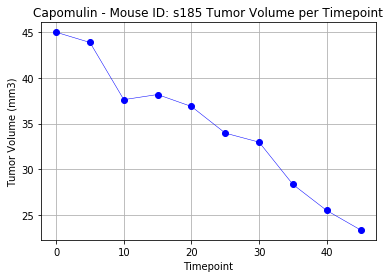

In [16]:
# Capomulin Treatement Mouse ID s185 data
mouse_s185 = cleaned_study_data.loc[(cleaned_study_data["Mouse ID"] == "s185"),:]

#Setting axis values
x_axis = mouse_s185["Timepoint"]
y_axis = mouse_s185["Tumor Volume (mm3)"]

# Creating plot and labeling
plt.plot(x_axis, y_axis, linewidth=.5, marker="o", color="blue")
plt.title("Capomulin - Mouse ID: s185 Tumor Volume per Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Saving and showing figure
plt.savefig('Figures/Capomulin mouse s185 tumor volume.jpg')
plt.show()

In the study of Capomulin, the correlation between mouse weight and average tumor volume is 0.842
The r-squared is: 0.7088732387169576


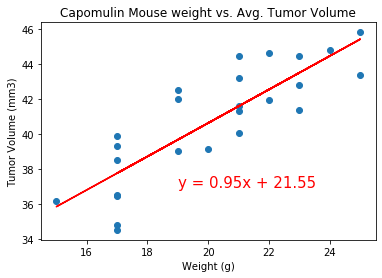

In [17]:
# Correlation coefficient and Linear regression for Capomulin treatmetn
cap_mouse = capomulin.groupby(['Mouse ID']).agg(\
                                               mouse_weight =('Weight (g)',np.mean),\
                                               tumor_vol_mean = ('Tumor Volume (mm3)',np.mean)).round(3)
# setting df values
capomulin_weight = cap_mouse["mouse_weight"]
capomulin_tumor_size = cap_mouse["tumor_vol_mean"]

#Correlation coeficient 
capo_correlation = round(capomulin_tumor_size.corr(capomulin_weight),3)
print(f'In the study of Capomulin, the correlation between mouse weight and average tumor volume is {capo_correlation}')

# Creating line for slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight, capomulin_tumor_size)
regress_values = capomulin_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creating Scatter Plot
plt.scatter(capomulin_weight,capomulin_tumor_size)
plt.plot(capomulin_weight,regress_values,"r-")
plt.annotate(line_eq,(19,37),fontsize=15,color="red")
plt.title("Capomulin Mouse weight vs. Avg. Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")

# Saving figure and showing plot
plt.savefig('Figures/Capomulin weight to tumor mass scatter.jpg')
plt.show()

mouse_weight  tumor_vol_mean
Mouse ID                              
b128                22          41.964
b742                21          40.084
f966                17          36.506
g288                19          41.990
g316                22          44.613
i557                24          44.806
i738                20          39.141
j119                23          44.465
j246                21          43.217
l509                21          44.434
l897                19          42.507
m601                17          34.847
m957                19          39.050
r157                25          45.799
r554                17          36.509
r944                25          43.367
s185                17          34.559
s710                23          42.804
t565                17          39.329
u364                17          39.887
v923                21          41.582
w150                23          41.385
w914                21          41.352
x401                15          36.182
y793                17          38.507

index Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       10     s185    Capomulin  Female           3          17          0   
1       11     s185    Capomulin  Female           3          17          5   
2       12     s185    Capomulin  Female           3          17         10   
3       13     s185    Capomulin  Female           3          17         15   
4       14     s185    Capomulin  Female           3          17         20   
..     ...      ...          ...     ...         ...         ...        ...   
225    440     i557    Capomulin  Female           1          24         45   
226   1452     r157    Capomulin    Male          22          25          0   
227   1453     r157    Capomulin    Male          22          25          5   
228   1454     r157    Capomulin    Male          22          25         10   
229   1455     r157    Capomulin    Male          22          25         15   

     Tumor Volume (mm3)  Metastatic Sites  
0             45.000000                 0  
1             43.878496                 0  
2             37.614948                 0  
3             38.177232                 0  
4             36.866876                 0  
..                  ...               ...  
225           47.685963                 1  
226           45.000000                 0  
227           45.597064                 0  
228           46.059608                 0  
229           46.539206                 0  

[230 rows x 9 columns]